In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

In [2]:
mice = ['ym212','ym213','ym214','ym215','ym218','ym219','ym220','ym222','ym223','ym224','ym226','ym227']  

# non_freeze_lgbm vs Shuffled_baseline

Shuffled baseline data from the last line of "Yuichi_Project_STEP4_Modeling Z-score Features (3std) all batches EXCLUDE corr _ Figure5_1.ipynb"

----- non-freeze -----
stat:  0.0
p-value:  0.00048828125
----- freeze -----
stat:  3.0
p-value:  0.00244140625


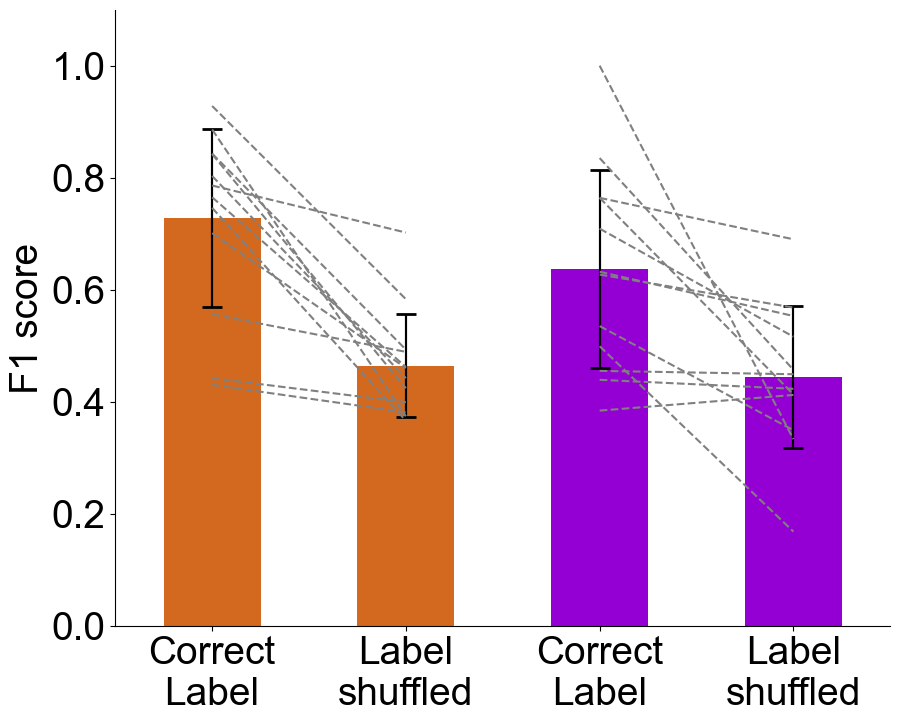

In [7]:
plt.figure(figsize=(10, 8))

# ---------- non-freeze ----------
non_freeze_shuffled_control = np.array([0.366, 0.46, 0.702, 0.399, 0.493, 0.583, 0.381, 0.424, 0.489, 0.374, 0.462, 0.442])
non_freeze_lgbm = np.array([0.746, 0.701, 0.786, 0.442, 0.843, 0.928, 0.43, 0.842, 0.556, 0.886, 0.765, 0.803])

non_freeze_lgbm_mean = np.mean(non_freeze_lgbm)
non_freeze_lgbm_std = np.std(non_freeze_lgbm)
non_freeze_shuffled_control_mean = np.mean(non_freeze_shuffled_control)
non_freeze_shuffled_control_std = np.std(non_freeze_shuffled_control)

plt.bar([1,2], [non_freeze_lgbm_mean, non_freeze_shuffled_control_mean], yerr=[non_freeze_lgbm_std, non_freeze_shuffled_control_std], width=0.5, color=['chocolate','chocolate'])

# make a cap for the error bar
plt.errorbar([1,2], [non_freeze_lgbm_mean, non_freeze_shuffled_control_mean], yerr=[non_freeze_lgbm_std, non_freeze_shuffled_control_std], fmt='none', ecolor='black', capsize=7, capthick=2)

# # plot the scatter plot of each group
# plt.scatter(np.ones(len(non_freeze_shuffled_control))*2, non_freeze_shuffled_control, color='black', marker='o')
# plt.scatter(np.ones(len(non_freeze_lgbm)), non_freeze_lgbm, color='black', marker='o')

# connect each pair of points from non_freeze_shuffled_control and non_freeze_lgbm by a dash line
for i in range(len(non_freeze_shuffled_control)):
    plt.plot([1,2], [non_freeze_lgbm[i], non_freeze_shuffled_control[i]], color='grey', linestyle='--')

# do a wilcoxon signed rank sum test of the groups, and print the p-value
stat, p = wilcoxon(non_freeze_lgbm, non_freeze_shuffled_control)
print('----- non-freeze -----')
print('stat: ', stat)
print('p-value: ', p) 

# ---------- freeze --------------
freeze_shuffled_control = np.array([0.568, 0.69, 0.333, 0.423, 0.413, 0.457, 0.553, 0.168, 0.349, 0.412, 0.449, 0.516])
freeze_lgbm = np.array([0.627, 0.764, 1, 0.439, 0.764, 0.835, 0.632, 0.499, 0.535, 0.384, 0.455, 0.709])

freeze_lgbm_mean = np.mean(freeze_lgbm)
freeze_lgbm_std = np.std(freeze_lgbm)
freeze_shuffled_control_mean = np.mean(freeze_shuffled_control)
freeze_shuffled_control_std = np.std(freeze_shuffled_control)

plt.bar([3,4], [freeze_lgbm_mean, freeze_shuffled_control_mean], yerr=[freeze_lgbm_std, freeze_shuffled_control_std], width=0.5, color=['darkviolet','darkviolet'])

# make a cap for the error bar
plt.errorbar([3,4], [freeze_lgbm_mean, freeze_shuffled_control_mean], yerr=[freeze_lgbm_std, freeze_shuffled_control_std], fmt='none', ecolor='black', capsize=7, capthick=2)

plt.xticks([1,2,3,4],['Correct\nLabel', 'Label\nshuffled','Correct\nLabel', 'Label\nshuffled'], font='Arial', fontsize=28)

# # plot the scatter plot of each group
# plt.scatter(np.ones(len(freeze_shuffled_control))*4, freeze_shuffled_control, color='black', marker='o')
# plt.scatter(np.ones(len(freeze_lgbm))*3, freeze_lgbm, color='black', marker='o')

# connect each pair of points from freeze_shuffled_control and freeze_lgbm by a dash line
for i in range(len(freeze_shuffled_control)):
    plt.plot([3,4], [freeze_lgbm[i], freeze_shuffled_control[i]], color='grey', linestyle='--')

# do a wilcoxon signed rank sum test of the groups, and print the p-value
stat, p = wilcoxon(freeze_lgbm, freeze_shuffled_control)
print('----- freeze -----')
print('stat: ', stat)
print('p-value: ', p)

# --------------------------------

plt.ylabel('F1 score', font='Arial', fontsize=28)
# plt.title('LightGBM', font='Arial', fontsize=30)
# make the bars' width smaller
plt.xlim(0.5,4.5)
plt.ylim(0,1.1)

# make the y axis font size larger
plt.yticks(font='Arial', fontsize=28)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.show()